In [1]:
import tensorflow as tf

In [2]:
import pandas as pd
train=pd.read_csv('C://Users//Gowrav Tata//Data Science//Kaggle//digit-recognizer//train.csv')
test=pd.read_csv('C://Users//Gowrav Tata//Data Science//Kaggle//digit-recognizer//test.csv')

In [3]:
from keras.models import Sequential
from keras.layers import Flatten,Dense,Dropout,Conv2D,MaxPooling2D
from keras.utils import np_utils,to_categorical
import numpy as np
from keras_preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [4]:
x_train = train.iloc[:, 1:785].values
y_train = train.iloc[:, 0].values
x_test = test.iloc[:, 0:784].values

In [5]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

(42000, 784)
(42000,)
(28000, 784)


In [6]:
x_train=x_train/255.0
x_test=x_test/255.0

In [7]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [8]:
batch_size = 64
epochs = 10
input_shape = (28,28,1)
seed = 5
np.random.seed(seed)

In [9]:
y_train = to_categorical(y_train, 10)
from sklearn.model_selection import train_test_split
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size = 0.2, random_state=seed)

In [10]:
print(x_train.shape)
print(x_validation.shape)
print(y_train.shape)
print(y_validation.shape)

(33600, 28, 28, 1)
(8400, 28, 28, 1)
(33600, 10)
(8400, 10)


In [13]:
#Initiating the model
model=Sequential()

model.add(Conv2D(32, kernel_size = (3,3), input_shape= input_shape, activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(10, activation = 'sigmoid'))

In [14]:
#compiling
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 800)               0         
__________

In [17]:
model.fit(x_train,y_train,epochs=epochs,verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/10





33600/33600 [==============================] - 27s 793us/step - loss: 0.2163 - acc: 0.9315
Epoch 2/10
33600/33600 [==============================] - 24s 716us/step - loss: 0.0752 - acc: 0.9756
Epoch 3/10
33600/33600 [==============================] - 27s 798us/step - loss: 0.0536 - acc: 0.9840
Epoch 4/10
33600/33600 [==============================] - 23s 683us/step - loss: 0.0484 - acc: 0.9846
Epoch 5/10
33600/33600 [==============================] - 27s 803us/step - loss: 0.0385 - acc: 0.9880
Epoch 6/10
33600/33600 [==============================] - 28s 831us/step - loss: 0.0320 - acc: 0.9900
Epoch 7/10
33600/33600 [==============================] - 28s 823us/step - loss: 0.0316 - acc: 0.9901
Epoch 8/10
33600/33600 [==============================] - 25s 746us/step - loss: 0.0246 - acc: 0.9922
Epoch 9/10
33600/33600 [==============================] - 27s 807us/step - loss: 0

In [18]:
loss , accuracy = model.evaluate(x_validation, y_validation, verbose = 0)
print("Loss : ",loss, "Accuracy : ", accuracy)

Loss :  0.05461556466263108 Accuracy :  0.986547619047619


In [19]:
predicted_classes = model.predict_classes(x_test)

In [20]:
submissions=pd.DataFrame({"ImageId": list(range(1,len(predicted_classes)+1)), "Label": predicted_classes})

In [21]:
submissions.to_csv("submission.csv", index = False, header = True)

In [32]:
test_image=x_test[300]

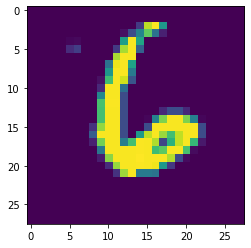

In [33]:
plt.imshow(x_test[300].reshape(28,28))

In [34]:
#test_image=np.asarray(test_image)
test_image=test_image.reshape(1,28,28,1)
result=model.predict(test_image)
(np.round(result)).argmax()

6

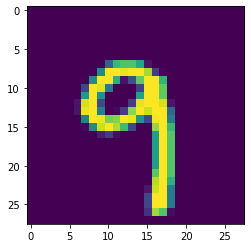

In [42]:
plt.imshow(x_test[400].reshape(28,28))

In [39]:
(np.round(model.predict(x_test[400].reshape(1,28,28,1)))).argmax()

9